# Severity Prediction
- **Objective:** To predict the severity level of a fault

In [14]:
# Import libraries
import pandas as pd  # Data tables
import seaborn as sns  # Create charts
import matplotlib.pyplot as plt  # Display charts
from sklearn.model_selection import train_test_split  # Split data for training and testing
from sklearn.preprocessing import LabelEncoder  # Convert text to numbers
from sklearn.tree import DecisionTreeClassifier  # Machine learning model
from sklearn.metrics import classification_report, confusion_matrix  # Check how well the model works

In [15]:
# Read data file
df = pd.read_csv('lighting_data_cleaned.csv')

# Display data
df

,light_id,location_name,fault_type,timestamp,severity_level,fault_status,maintenance_cost,year,month,day,day_of_week,hour
0,L0226,Pasir Ris,Control System,2020-01-01 01:22:25,High,Acknowledged,343.60,2020,1,1,Wednesday,1
1,L0061,City Hall,Control System,2020-01-01 23:45:18,Low,In Progress,271.80,2020,1,1,Wednesday,23
2,L0455,Pasir Ris,Power-Related,2020-01-02 01:33:02,Informational,Resolved,169.20,2020,1,2,Thursday,1
3,L0924,City Hall,Cybersecurity,2020-01-02 03:34:48,Informational,Resolved,372.45,2020,1,2,Thursday,3
4,L0134,Canberra,Communication,2020-01-02 08:09:16,Low,In Progress,335.57,2020,1,2,Thursday,8
...,...,...,...,...,...,...,...,...,...,...,...,...
461,L0835,Orchard Road,Sensor-Related,2020-12-24 23:46:51,Medium,Acknowledged,482.02,2020,12,24,Thursday,23
462,L0452,Jurong West,Environmental,2020-12-25 02:25:42,Informational,Detected,277.74,2020,12,25,Friday,2
463,L0483,Bishan,Sensor-Related,2020-12-25 02:34:36,Critical,In Progress,198.08,2020,12,25,Friday,2
464,L0683,Canberra,Control System,2020-12-29 20:00:19,Critical,In Progress,236.10,2020,12,29,Tuesday,20


In [16]:
# Convert severity_level from text to numbers due to ml works on numbers
severity_encoder = LabelEncoder()  # Help to convert from text to numbers
df['severity_encoded'] = severity_encoder.fit_transform(df['severity_level'])

# Display severity_encoded column
df[['severity_level', 'severity_encoded']]

,severity_level,severity_encoded
0,High,1
1,Low,3
2,Informational,2
3,Informational,2
4,Low,3
...,...,...
461,Medium,4
462,Informational,2
463,Critical,0
464,Critical,0


In [17]:
# Apply One-hot encoding using pd.get_dummies to create new columns(0 or 1)
df_encoded = pd.get_dummies(df, columns=['fault_type', 'location_name', 'fault_status'])

# Check the new columns
df_encoded.columns

Index(['light_id', 'timestamp', 'severity_level', 'maintenance_cost', 'year',
       'month', 'day', 'day_of_week', 'hour', 'severity_encoded',
       'fault_type_Communication', 'fault_type_Control System',
       'fault_type_Cybersecurity', 'fault_type_Environmental',
       'fault_type_Power-Related', 'fault_type_Sensor-Related',
       'location_name_Bishan', 'location_name_Bugis Junction',
       'location_name_Canberra', 'location_name_Chinatown',
       'location_name_City Hall', 'location_name_Jurong West',
       'location_name_Orchard Road', 'location_name_Outram Park',
       'location_name_Pasir Ris', 'location_name_Toa Payoh',
       'fault_status_Acknowledged', 'fault_status_Closed',
       'fault_status_Detected', 'fault_status_In Progress',
       'fault_status_Resolved'],
      dtype='object')

In [18]:
# Drop unused columns
df_encoded = df_encoded.drop(columns= ['light_id', 'timestamp', 'severity_level', 'maintenance_cost',	'year', 'day_of_week'])

# Check the new columns
df_encoded.head()

,month,day,hour,severity_encoded,fault_type_Communication,fault_type_Control System,fault_type_Cybersecurity,fault_type_Environmental,fault_type_Power-Related,fault_type_Sensor-Related,...,location_name_Jurong West,location_name_Orchard Road,location_name_Outram Park,location_name_Pasir Ris,location_name_Toa Payoh,fault_status_Acknowledged,fault_status_Closed,fault_status_Detected,fault_status_In Progress,fault_status_Resolved
0,1,1,1,1,False,True,False,False,False,False,...,False,False,False,True,False,True,False,False,False,False
1,1,1,23,3,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
2,1,2,1,2,False,False,False,False,True,False,...,False,False,False,True,False,False,False,False,False,True
3,1,2,3,2,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4,1,2,8,3,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False


In [19]:
# Split data feature X (input data points use to predict) & label y (output/target data points want to predict)

# Remove the severity_encoded column
X = df_encoded.drop('severity_encoded', axis=1)

# Target is severity_encoded
y = df_encoded['severity_encoded']

In [20]:
# Split data into training (teach model) and testing (check accuracy)
# random_state get same split each run

# X_train (input features), y_train (severity labels)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
# Train Decision Tree model
clf = DecisionTreeClassifier(random_state=42)

# Train (fit) the model on the training data
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [22]:
# Use the trained model to predict severity on test data
y_pred = clf.predict(X_test)

# Evaluate model performance
# Print detailed metrics showing how good predictions are
print(classification_report(y_test, y_pred, target_names=severity_encoder.classes_))

               precision    recall  f1-score   support

     Critical       0.09      0.09      0.09        23
         High       0.26      0.21      0.23        24
Informational       0.11      0.27      0.16        11
          Low       0.23      0.18      0.20        17
       Medium       0.33      0.21      0.26        19

     accuracy                           0.18        94
    macro avg       0.21      0.19      0.19        94
 weighted avg       0.21      0.18      0.19        94



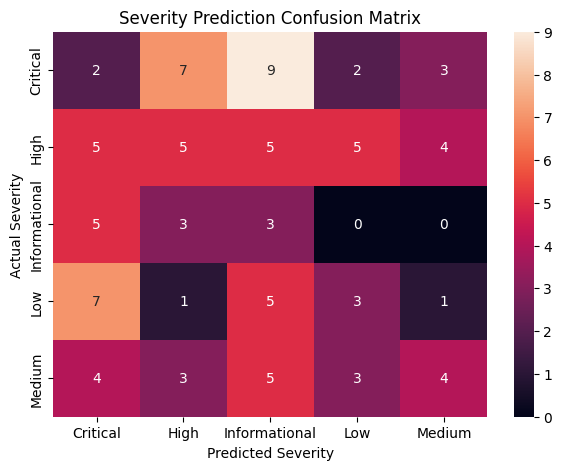

In [23]:
# Show confusion matrix heatmap to visualize errors and correct predictions
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(7,5))

sns.heatmap(
    cm,                         # The confusion matrix data to visualize (2D array)
    annot=True,                 # Show the numerical values inside each cell
    fmt='d',                   # Format the annotations as integers ('d' = decimal integer)
    xticklabels=severity_encoder.classes_,  # Labels for the columns (predicted classes)
    yticklabels=severity_encoder.classes_   # Labels for the rows (actual classes)
)

plt.xlabel('Predicted Severity')
plt.ylabel('Actual Severity')
plt.title('Severity Prediction Confusion Matrix')
plt.show()